In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import os
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import eli5
import cleanfunc
import re
from sklearn.metrics import r2_score
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource

importlib.reload(cleanfunc)


<module 'cleanfunc' from 'C:\\Users\\cartechr\\OneDrive - Mars Inc\\GitHub\\ABS-Region-Data\\cleanfunc.py'>

In [22]:
df = pd.read_csv('medians by code.csv')

C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

In [ ]:
df.head()


In [4]:
df = df.merge(pd.read_csv('latlng.csv'))

In [14]:
cycle_col = 'METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Bicycle no.'

X = df.iloc[:, 4:]
X.drop('Solar Per Household', axis = 1, inplace = True)
X.drop(cycle_col, axis = 1, inplace = True)
X.index = df.LABEL
X

,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,BUSINESS EXITS Number of non-employing business exits no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
LABEL,,,,,,,,,,,,,,,,,,,,,
Wyong,193.0,85.0,23.000000,631.0,40.0,34.0,7.000000,3.855263,84.0,48.0,...,0.100000,0.700000,28.6,9.4,86.1,6.3,7.6,8.2,-33.285641,151.425306
Orange,515.0,270.0,61.000000,1832.0,119.0,60.0,10.000000,3.855263,196.0,136.0,...,0.748598,0.400000,22.6,9.7,88.1,3.8,8.0,5.3,-33.329242,149.108147
Maitland,277.0,114.0,18.000000,1241.0,132.0,38.0,8.000000,3.855263,172.0,68.0,...,0.100000,0.600000,26.7,9.8,89.1,3.5,7.4,3.8,-32.708177,151.526844
Armidale,544.0,268.0,38.000000,2051.0,112.0,47.0,6.000000,3.855263,168.0,156.0,...,0.100000,0.600000,29.6,10.4,84.6,7.7,7.7,9.4,-30.412505,151.940140
Botany,372.0,155.0,63.000000,1203.0,127.0,56.0,3.000000,3.855263,188.0,88.0,...,2.000000,0.400000,23.1,8.7,82.6,10.5,7.0,25.5,-33.947829,151.199064
Hurstville,932.0,197.0,29.000000,2870.0,351.0,185.0,3.000000,3.000000,539.0,257.0,...,0.100000,0.200000,41.3,8.3,60.2,34.7,5.2,76.1,-33.960707,151.100361
Penrith,544.0,317.0,75.000000,1871.0,133.0,90.0,10.000000,3.855263,235.0,143.0,...,0.100000,1.200000,26.6,10.3,82.3,9.8,8.0,17.0,-33.751079,150.694168
Carlingford,730.0,135.0,17.000000,2456.0,302.0,119.0,3.000000,3.855263,425.0,208.0,...,0.100000,0.700000,33.3,6.6,78.4,17.9,3.7,55.1,-33.774495,151.047522
Fairfield,506.0,89.0,15.000000,1326.0,142.0,97.0,8.000000,3.855263,244.0,165.0,...,0.748598,2.300000,10.6,7.4,68.5,26.4,5.1,78.2,-33.867440,150.889310


In [7]:

y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']

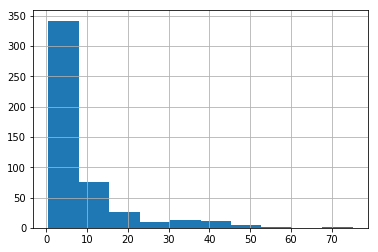

In [11]:
y.hist()

In [21]:
df = df[y<0.1]
#df = df[y>0.02]
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']*1000
y.index = X.index
X = df.drop([cycle_col], axis = 1)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 487 elements

[ 0.56893609  1.92940517  6.5430975  22.18928695 75.24944492]


array([2, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 4, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 4, 1, 1, 2, 1, 3, 1, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 4, 2,
       3, 2, 4, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 1, 1,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 4, 1, 2, 2, 2, 2, 4, 2,
       2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 4, 3, 2, 3, 4,
       4, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 4, 2, 1, 3, 4, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 2, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 2, 4, 2, 3, 4,

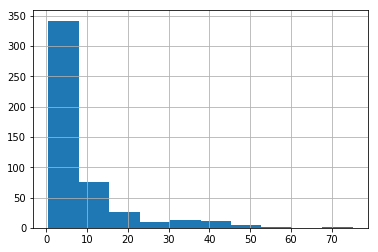

In [10]:
bins     = np.geomspace(min(y), max(y)+0.1, 5)
print(bins)
y_binned = np.digitize(y, bins)
y.hist()
df.shape
y_binned


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify = y_binned)


In [16]:
#ada = AdaBoostRegressor()
#ada.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:

from bokeh.models import HoverTool
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource

output_notebook()

hover = HoverTool()
source = ColumnDataSource(data=dict(
    x=y_test,
    y=y_pred,
    desc=y_test.index,
))

p = bokeh.plotting.figure(plot_width = 400, plot_height = 400)

p.circle('x', 'y', size=20, color = 'navy', alpha = 0.5, source = source)
hover.tooltips = [
    ("index", '$index'),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p.tools.append(hover)

show(p)

y_test.head()

In [17]:
y_test.index.tolist()

[16,
 307,
 243,
 159,
 378,
 136,
 303,
 443,
 97,
 99,
 445,
 138,
 192,
 26,
 134,
 56,
 363,
 302,
 151,
 235,
 285,
 392,
 132,
 156,
 234,
 370,
 371,
 142,
 487,
 83,
 9,
 449,
 308,
 186,
 398,
 381,
 295,
 353,
 19,
 281,
 149,
 137,
 409,
 101,
 265,
 43,
 114,
 229,
 315,
 328,
 63,
 119,
 233,
 333,
 401,
 469,
 337,
 169,
 104,
 424,
 201,
 11,
 65,
 453,
 304,
 164,
 319,
 273,
 162,
 157,
 432,
 420,
 423,
 357,
 430,
 154,
 40,
 45,
 12,
 465,
 34,
 426,
 20,
 41,
 411,
 402,
 459,
 53,
 84,
 30,
 81,
 299,
 49,
 242,
 373,
 249,
 454,
 336]

In [20]:
#y.index = X.index
y

Series([], dtype: float64)

In [ ]:
y_pred = rf.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [ ]:
perm = eli5.sklearn.PermutationImportance(ada).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
r2_score(y_test, y_pred)


In [ ]:
eli5.explain_prediction(rf, doc = X_test.iloc[60, :], top = 5)

In [ ]:
paramgrid = {'n_estimators': [50, 100, 1000],
             'learning_rate':[0.01,0.1,1]
            }

gb = GridSearchCV(AdaBoostRegressor(), param_grid = paramgrid, verbose = 2)

In [ ]:
#ada.get_params().keys()
gb.fit(X_train, y_train)

In [ ]:
y_pred = gb.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [ ]:
r2_score(y_test, y_pred)


In [ ]:
gb.best_params_